In [1]:
import pandas as pd
import numpy as np
import torch
import tensorflow as tf
from tensorflow import keras

In [2]:
import matplotlib.pyplot as plt

# Read in data

In [8]:
df_train = pd.read_csv("mnist_train.csv", header = None)

In [9]:
df_test = pd.read_csv("mnist_test.csv", header = None)

In [11]:
X_train = df_train[[i for i in df_train if i != 0]]

In [27]:
X_test = df_test[[i for i in df_test if i != 0]]

In [13]:
y_train = df_train[[0]]

In [28]:
y_test = df_test[[0]]

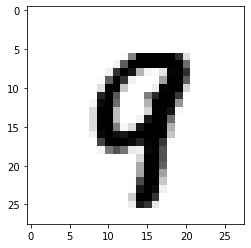

In [21]:
img = X_train.to_numpy().reshape(-1,28,28)[800]
plt.imshow(img, cmap="Greys")
plt.show()
    

# With Tensorflow

In [22]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [25]:
X_train_n = X_train/255

In [29]:
X_test_n = X_test/255

In [37]:
inputs = keras.Input(shape=(28,28,1))

In [38]:
conv_layer = keras.layers.Conv2D(16,3, activation='relu')(inputs)

In [39]:
flatten_layer = keras.layers.Flatten()(conv_layer)

In [41]:
dense_layer = keras.layers.Dense(120, activation='relu')(flatten_layer)

In [42]:
outputs = keras.layers.Dense(10)(dense_layer)

In [43]:
model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

In [44]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               1298040   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1210      
Total params: 1,299,410
Trainable params: 1,299,410
Non-trainable params: 0
_________________________________________________________________


In [46]:
keras.utils.plot_model(model, 'mnist_model.png')

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [65]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [66]:
optimiser = keras.optimizers.Adam()

In [67]:
y_train_n = pd.get_dummies(y_train[0])

In [72]:
tf.keras.backend.clear_session()

In [91]:
model.compile(loss=loss,
              optimizer=optimiser,
              metrics=['accuracy'])

In [74]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_n.to_numpy().reshape(-1,28,28,1), y_train.to_numpy()))
# test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

In [76]:
batch_size = 32

In [79]:
train_dataset=train_dataset.batch(batch_size)

In [94]:
history = model.fit(X_train_n.to_numpy().reshape(-1,28,28,1),y_train.to_numpy(),
                    batch_size=32,
                    epochs=5,
                    validation_split=0.2
                   )

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 8s 167us/sample - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0057 - val_accuracy: 0.9983
Epoch 2/5
48000/48000 [==============================] - 8s 163us/sample - loss: 1.6867e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 0.9988
Epoch 3/5
48000/48000 [==============================] - 8s 162us/sample - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0125 - val_accuracy: 0.9962
Epoch 4/5
48000/48000 [==============================] - 8s 164us/sample - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0198 - val_accuracy: 0.9953
Epoch 5/5
48000/48000 [==============================] - 8s 169us/sample - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0183 - val_accuracy: 0.9960


In [82]:
history = model.fit(train_dataset,
#                     batch_size=32,
                    epochs=5,
#                     validation_split=0.2
                   )

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1471 - accuracy: 0.9564
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0457 - accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0216 - accuracy: 0.9937
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0137 - accuracy: 0.9958
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0099 - accuracy: 0.9966


In [95]:
test_scores = model.evaluate(X_test_n.to_numpy().reshape(-1,28,28,1), y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

10000/10000 - 0s - loss: 0.1178 - accuracy: 0.9844
Test loss: 0.11779949705189056
Test accuracy: 0.9844


In [87]:
df_pred=pd.DataFrame(model.predict(X_test_n.to_numpy().reshape(-1,28,28,1)))

In [89]:
df_pred.idxmax(axis=1)

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: int64

In [90]:
y_test

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


# With PyTorch

In [96]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
inputs = keras.Input(shape=(28,28,1))

conv_layer = keras.layers.Conv2D(filters=16,kernel_size=3, activation='relu')(inputs)

flatten_layer = keras.layers.Flatten()(conv_layer)

dense_layer = keras.layers.Dense(120, activation='relu')(flatten_layer)

outputs = keras.layers.Dense(10)(dense_layer)

In [170]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv_layer = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1)
        self.flatten = nn.Flatten()
        self.dense = nn.Linear(16*26*26,120)
        self.out = nn.Linear(120,10)
    def forward(self, x):
        x = F.relu(self.conv_layer(x))
        x = self.flatten(x)
        x = F.relu(self.dense(x))
        return self.out(x)
        

In [171]:
net = Net()

In [172]:
criterion = nn.CrossEntropyLoss()

In [173]:
optimiser = torch.optim.Adam(net.parameters(), lr=3e-4)

In [174]:
import torchvision

In [175]:
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [176]:
# X_train_n.to_numpy().reshape(-1,28,28)

In [177]:
tensor_x = torch.Tensor(X_train_n.to_numpy().reshape(-1,1,28,28))

In [197]:
tensor_y = torch.Tensor(y_train[0].to_numpy())

In [202]:
tensor_test_x = torch.Tensor(X_test_n.to_numpy().reshape(-1,1,28,28))

In [203]:
tensor_test_y = torch.Tensor(y_test[0].to_numpy())

In [198]:
train_dataset = torch.utils.data.TensorDataset(tensor_x,tensor_y)

In [204]:
test_dataset = torch.utils.data.TensorDataset(tensor_test_x,tensor_test_y)

In [199]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size = 32)

In [205]:
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size = 32)

In [201]:
for epoch in range(5):
    running_loss=0
    for i, data in enumerate(train_dataloader,0):
        inputs, labels = data
        labels = labels.long()
        optimiser.zero_grad()
        
        outputs = net(inputs)
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimiser.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

In [168]:
x = torch.randn(2, 1, 28, 28)

In [208]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %0.2f %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 98.06 %


In [209]:
outputs

tensor([[ -6.7316,   9.1470,  -3.7156,  -4.3561,  -1.1314,  -9.9338,  -6.8818,
           0.2114,  -0.5346,  -4.3501],
        [ -3.0075,   4.7013,  11.5417,   2.9210, -14.1778,  -9.7587, -14.6883,
           2.1562,   2.5139,  -6.2771],
        [ -6.6469,  -0.3976,  -1.0141,  10.1025, -10.3322,  -2.3105, -14.8196,
          -4.2394,   2.5482,  -0.2125],
        [-10.1564,  -5.0379,  -8.1963,  -8.4229,  14.9353,  -5.9715,  -3.7886,
          -1.9802,  -0.1084,   2.0059],
        [ -6.2135,  -6.3261,  -7.5045,   2.9845,  -7.4472,  15.3584, -12.5853,
         -10.3782,   5.1164,  -1.3330],
        [ -1.8402,  -5.7509,  -1.9390,  -0.9292,  -0.0363,   4.5910,  14.6122,
         -13.9434,  -0.4044,  -6.1997],
        [ -6.2035,   0.9674,   0.7587,   2.3095, -13.2965,  -9.3229, -20.9711,
          12.0915,  -1.0917,  -0.1380],
        [ -1.3914,  -3.6507,  -0.1720,   0.5223, -12.3246,   1.0013,  -9.9574,
          -4.6155,  11.8718,  -2.1543],
        [ -8.9615, -13.4947,  -5.4741,  -1.1353,

# Traditional Methods

In [211]:
from sklearn.linear_model import LogisticRegressionCV

In [213]:
X_train_n

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:
logreg = LogisticRegressionCV(cv=5, multi_class='multinomial', random_state=42)

In [215]:
logreg.fit(X_train_n, y_train)

/Users/joseph_cross/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joseph_cross/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/joseph_cross/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/joseph_cross/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/joseph_cross/Anaconda/anac

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=42, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [220]:
logreg.score(X_train_n, y_train)

0.9367

In [225]:
y_pred = logreg.predict(X_test_n)

In [227]:
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix

In [226]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[8972,   48],
        [  22,  958]],

       [[8821,   44],
        [  24, 1111]],

       [[8901,   67],
        [ 101,  931]],

       [[8894,   96],
        [  86,  924]],

       [[8953,   65],
        [  63,  919]],

       [[9022,   86],
        [ 115,  777]],

       [[8982,   60],
        [  48,  910]],

       [[8906,   66],
        [  81,  947]],

       [[8913,  113],
        [ 113,  861]],

       [[8900,   91],
        [  83,  926]]])

In [231]:
cm = confusion_matrix(y_test, y_pred, labels = [i for i in range(10)])

In [246]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig,ax = plt.subplots(figsize = (10,10))
    im1 = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    fig.colorbar(im1,fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')


    plt.tight_layout()

Confusion matrix, without normalization
[[ 958    0    2    3    0    7    4    5    1    0]
 [   0 1111    3    2    0    2    4    2   11    0]
 [   6    9  931   15   10    3   12    9   33    4]
 [   4    1   15  924    0   25    3   10   21    7]
 [   1    3    6    3  919    0    8    3    7   32]
 [   9    2    2   35   10  777   16    7   30    4]
 [   8    3    8    2    8   16  910    2    1    0]
 [   1    8   24    7    6    1    0  947    2   32]
 [   9   10    6   20    9   26   13    8  861   12]
 [  10    8    1    9   22    6    0   20    7  926]]


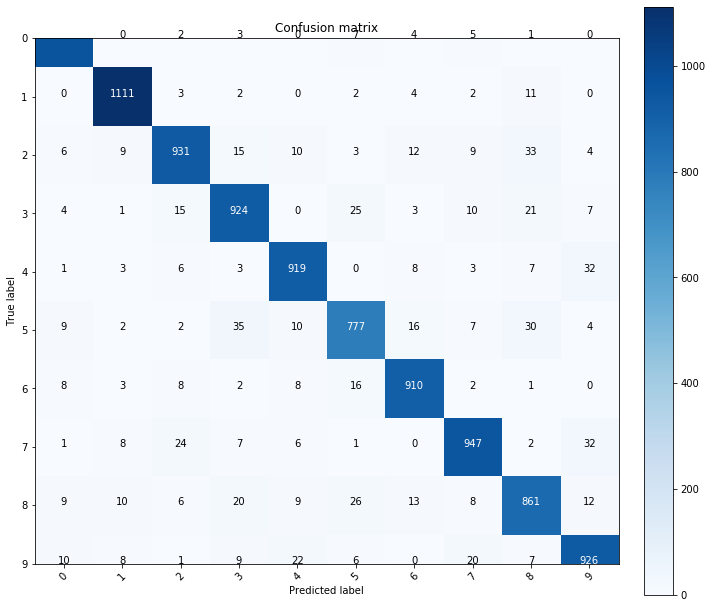

In [247]:
plot_confusion_matrix(cm, classes=[i for i in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
plt.show()

# XGBoost

In [249]:
from xgboost import XGBClassifier

In [253]:
xgb = XGBClassifier(n_estimators=10, max_depth= 5, objective = "multi:softmax", num_class = 10)

In [254]:
xgb.fit(X_train_n, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, num_class=10, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)